<a href="https://colab.research.google.com/github/fbeilstein/machine_learning/blob/master/workbook_04_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Run the following code to get helper functions:
* `display_pandas(series_or_dataframe)` -- visualizes Series or DataFrame as a neat table.

In [1]:
#@title Helper Functions

def pandas_to_html(obj, ordering=False):
  import pandas as pd
  if type(obj) == pd.core.series.Series:
    if obj.name != None:
      obj = pd.DataFrame(obj)#, columns=[' '])
    else:
      obj = pd.DataFrame(obj, columns=[' '])
  
  class_name = 'pandas_table'
  if obj.shape[0] > 10:
    class_name += '_long'
  else:
    class_name += '_short'

  if ordering:
    class_name += '_ordered'
  else:
    class_name += '_unordered'


  main_str = '''
  <script src="https://ajax.googleapis.com/ajax/libs/jquery/3.5.1/jquery.min.js"></script>
  <link rel="stylesheet" type="text/css" href="https://cdn.datatables.net/1.10.21/css/jquery.dataTables.css">
  <script type="text/javascript" charset="utf8" src="https://cdn.datatables.net/1.10.21/js/jquery.dataTables.js"></script>
  ''' + obj.to_html(classes=[class_name, 'cell-border']) + '''
  <script>
  $(document).ready( function () {
      $('.pandas_table_long_ordered').DataTable({"autoWidth": false});
      $('.pandas_table_long_ordered').removeClass("pandas_table_long_ordered");
      $('.pandas_table_short_ordered').DataTable({"autoWidth": false, "paging":false, "searching":false, "info":false});
      $('.pandas_table_short_ordered').removeClass("pandas_table_short_ordered");

      $('.pandas_table_long_unordered').DataTable({"autoWidth": false, "ordering":false, "paging":true});
      $('.pandas_table_long_unordered').removeClass("pandas_table_long_unordered");
      $('.pandas_table_short_unordered').DataTable({"autoWidth": false, "paging":false, "searching":false, "info":false, "ordering":false});
      $('.pandas_table_short_unordered').removeClass("pandas_table_short_unordered");
  } );
  </script>
  '''
  return main_str

def display_pandas(obj, ordering=False):
  import IPython
  from google.colab import output
  display(IPython.display.HTML(pandas_to_html(obj, ordering)))

str_style_bigtbl = '''
<style>
.bigtable {
  border-collapse: collapse;
}

.bigtd {
  border: 3px solid #d4d4d3ff;
  min-width:50%;
  min-width:50%;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #474747;
  font-size:15px;
  font-weight: bolder;
  padding: 19px;
}

</style>
'''

def envelope_tbl(lst):
  result = '<table class="bigtable">\n'
  for row in lst:
    result += '<tr>\n\t'
    for e in row:
      if isinstance(e, dict):
        result += '<td class="bigtd"'
        for key in e:
          if key != 'text':
            result += str(key) + '="' + str(e[key]) + '" '
        result += '><div width="40px">' + str(e['text']) + '</div></td>'
      else:
        result += '<td class="bigtd">' + str(e) + '</td>'
    result += '\n</tr>\n'
  result += '</table>'
  return result

def draw_tbl(lst):
  result = envelope_tbl(lst)
  import IPython
  from google.colab import output
  display(IPython.display.HTML(str_style_bigtbl + result))

# Importing pandas

Difficulty: **easy**

In [ ]:
#@title Difficulty:
%%html 

<svg width="25mm" height="8mm" version="1.1" viewBox="0 0 38.506 12.662" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-13.418 -11.061)">
  <rect x="13.418" y="11.061" width="38.506" height="12.662" rx="2.3559" fill="#00a54b"/>
  <text x="22.959692" y="20.304243" fill="#ffffff" font-family="Verdana" font-size="8.531px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="22.959692" y="20.304243" fill="#ffffff" font-family="'Courier New'" font-size="8.531px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">EASY</tspan></text>
 </g>
</svg>


##Problem 1.

 Print the version of pandas that has been imported.

In [ ]:
import pandas as pd

# Enter your code here

In [ ]:
#@title Solution (double-click to open)

import pandas as pd

# Solution
pd.__version__

'1.0.5'

# DataFrame basics

Difficulty: **easy**



In [ ]:
#@title Difficulty:
%%html 

<svg width="25mm" height="8mm" version="1.1" viewBox="0 0 38.506 12.662" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-13.418 -11.061)">
  <rect x="13.418" y="11.061" width="38.506" height="12.662" rx="2.3559" fill="#00a54b"/>
  <text x="22.959692" y="20.304243" fill="#ffffff" font-family="Verdana" font-size="8.531px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="22.959692" y="20.304243" fill="#ffffff" font-family="'Courier New'" font-size="8.531px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">EASY</tspan></text>
 </g>
</svg>


##Problem 1.


Create a DataFrame from given Python dictionary data



In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']

# Enter your code here
df = 

# Visualize
display_pandas(df)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']

# Solution
df = pd.DataFrame(data, index=labels)

# Visualize
display_pandas(df)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


##Problem 2.

**Problem:**
Display a summary on Python Objects contained within the given DataFrame.

In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Solution
df.info()

##Problem 3.

**Problem:**
Display a summary on information contained within DataFrame given.



In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
summary = 

# Visualize
display_pandas(summary)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Solution
summary = df.describe()

# Visualize
display_pandas(summary)

,age,visits
count,8.000000,10.000000
mean,3.437500,1.900000
std,2.007797,0.875595
min,0.500000,1.000000
25%,2.375000,1.000000
50%,3.000000,2.000000
75%,4.625000,2.750000
max,7.000000,3.000000


##Problem 4.

**Problem:**
Return the first 3 rows of the DataFrame given.



In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
selection = 

# Visualize
display_pandas(selection)

In [ ]:
#@title ###Solution A (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Solution
selection = df.iloc[:3]

# Visualize
display_pandas(selection)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [ ]:
#@title ###Solution B (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Solution
selection = df.head(3)

# Visualize
display_pandas(selection)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


##Problem 5.



 **Problem:**
 Select just the "animal" and "age" columns from the DataFrame given.

In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
selection = 

# Visualize
display_pandas(selection)

In [ ]:
#@title ###Solution A (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Solution
selection = df.loc[:, ['animal', 'age']]

# Visualize
display_pandas(selection)

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


In [ ]:
#@title ###Solution B (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Solution
selection = df[['animal', 'age']]

# Visualize
display_pandas(selection)

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


##Problem 6.



 **Problem:**
 Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
selection = 

# Visualize
display_pandas(selection)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Solution
selection = df.loc[df.index[[3, 4, 8]], ['animal', 'age']]

# Visualize
display_pandas(selection)

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


##Problem 7.

**Problem:**
Select only the rows where the number of visits is greater than 2.



In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
selection = 

# Visualize
display_pandas(selection)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
selection = df[df['visits'] > 2]

# Visualize
display_pandas(selection)

,animal,age,visits,priority
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,2.0,3,no


##Problem 8.

**Problem:**
Select the rows where the age is missing, i.e. is `NaN`.

In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
selection =

# Visualize
display_pandas(selection)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
selection = df[df['age'].isnull()]

# Visualize
display_pandas(selection)

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


##Problem 9.

**Problem:**
Select the rows where the animal is a cat *and* the age is less than 3.

In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
selection = 

# Visualize
display_pandas(selection)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
selection = df[(df['animal'] == 'cat') & (df['age'] < 3)]

# Visualize
display_pandas(selection)

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


##Problem 10.

**Problem:**
Select the rows the age is between 2 and 4 (inclusive).


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
selection = 

# Visualize
display_pandas(selection)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
selection = df[df['age'].between(2, 4)]

# Visualize
display_pandas(selection)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


##Problem 11.

**Problem:**
Change the age in row 'f' to 1.5.


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here


# Visualize
display_pandas(df)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
df.loc['f', 'age'] = 1.5

# Visualize
display_pandas(df)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


##Problem 12.

**Problem:**
Calculate the sum of all visits (the total number of visits).


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
df['visits'].sum()

19

##Problem 13.

**Problem:**
Calculate the mean age for each different animal in `df`.


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
means = 

# Visualize
display_pandas(means)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
means = df.groupby('animal')['age'].mean()

# Visualize
display_pandas(means)

,age
animal,
cat,2.5
dog,5.0
snake,2.5


##Problem 14.

**Problem:**
Append a new row 'k' to `df` with your choice of values for each column.
Then delete that row to return the original DataFrame.


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)
initial_table = pandas_to_html(df)

# Add new row here

# For visualization
with_row_added = pandas_to_html(df)

# Remove row here

# For visualization
with_row_removed = pandas_to_html(df)

# Visualization
draw_tbl([["Initial", "Row Added", "Row Removed"],
          [initial_table, with_row_added, with_row_removed]])

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Add new row here
df.loc['k'] = [5.5, 'dog', 'no', 2]

# For visualization
with_row_added = pandas_to_html(df)

# Remove row here
df = df.drop('k')

# For visualization
with_row_removed = pandas_to_html(df)

# Visualization
draw_tbl([["Initial", "Row Added", "Row Removed"],
          [initial_table, with_row_added, with_row_removed]])

##Problem 15.


**Problem:**
Count the number of each type of animal in `df`.


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
counts = 

# Visualize
display_pandas(counts)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
counts = df['animal'].value_counts()

# Visualize
display_pandas(counts)

,animal
cat,4
dog,4
snake,2


##Problem 16.

**Problem:**
Sort `df` first by the values in the 'age' in *decending* order, then by
the value in the 'visit' column in *ascending* order.


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
sorted = 

# Visualize
display_pandas(sorted)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
sorted = df.sort_values(by=['age', 'visits'], ascending=[False, True])

# Visualize
display_pandas(sorted)

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


##Problem 17.

**Problem:**
The 'priority' column contains the values 'yes' and 'no'.
Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
df['priority'] = df['priority'].map({'yes': True, 'no': False})

# Visualize
display_pandas(df)

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,2.0,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


##Problem 18.

**Problem:**
In the 'animal' column, change the 'snake' entries to 'python'.


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
df['animal'] = df['animal'].replace('snake', 'python')

# Visualize
display_pandas(df)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,python,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,python,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


##Problem 18.

**Problem:**
For each animal type and each number of visits, find the mean age. 
In other words, create new table.
Each row should be an animal, each column should be a number of visits and the values should be the mean ages.
**Hint:** use a pivot table.


In [ ]:
import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

# Enter your code here
mean_age =

# Visualize
display_pandas(mean_age)

In [ ]:
#@title ###Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
data = {'animal'  : ['cat', 'cat', 'snake',  'dog', 'dog', 'cat', 'snake',  'cat', 'dog', 'dog'],
        'age'     : [  2.5,     3,     0.5, np.nan,     5,     2,     4.5, np.nan,     7,     3],
        'visits'  : [    1,     3,       2,      3,     2,     3,       1,      1,     2,     1],
        'priority': ['yes', 'yes',    'no',  'yes',  'no',  'no',    'no',  'yes',  'no',  'no']}
labels =            [  'a',   'b',     'c',    'd',   'e',   'f',     'g',    'h',   'i',   'j']
df = pd.DataFrame(data, index=labels)

#Solution
mean_age = df.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')

# Visualize
display_pandas(mean_age)

visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


# DataFrames: beyond the basics

Difficulty: **medium**

In [ ]:
#@title Difficulty:
%%html 

<svg width="25mm" height="8mm" version="1.1" viewBox="0 0 38.506 12.662" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-13.418 -11.061)">
  <rect x="13.418" y="11.061" width="38.506" height="12.662" rx="2.3559" fill="#ffa512"/>
  <text x="17.290049" y="20.13888" fill="#ffffff" font-family="Verdana" font-size="8.531px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="17.290049" y="20.13888" fill="#ffffff" font-family="'Courier New'" font-size="8.531px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">MEDIUM</tspan></text>
 </g>
</svg>



##Problem 1.

**Problem:**
Given dataframe, consider column "A" and filter out rows which contain the same integer as the row immediately above.

In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 2, 2, 2, 2, 6, 7, 7]})

# Enter your code here
filtered =

# Visualize
display_pandas(filtered)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 2, 2, 2, 2, 6, 7, 7]})

# Solution
filtered = df.loc[df['A'].shift() != df['A']]

# Visualize
display_pandas(filtered)

,A
0,1
1,2
3,3
4,4
5,5
8,2
12,6
13,7


##Problem 2.

**Problem:**
Given a DataFrame of numeric values, subtract the row mean from each element in the row.




In [ ]:
import numpy as np
import pandas as ps

# Input
df = pd.DataFrame({'A': [  5,  -1,  -3,   9,   8],
                   'B': [  9,   9,  -1,   5,  -2],
                   'C': [ -5,  10,  -5,   9, -10]})

# Enter your code here
subtracted = 

# Visualize
display_pandas(subtracted)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as ps

# Input
df = pd.DataFrame({'A': [  5,  -1,  -3,   9,   8],
                   'B': [  9,   9,  -1,   5,  -2],
                   'C': [ -5,  10,  -5,   9, -10]})

# Solution
subtracted = df.sub(df.mean(axis=1), axis=0)

# Visualize
display_pandas(subtracted)

,A,B,C
0,2.000000,6.000000,-8.000000
1,-7.000000,3.000000,4.000000
2,0.000000,2.000000,-2.000000
3,1.333333,-2.666667,1.333333
4,9.333333,-0.666667,-8.666667


##Problem 3.

**Problem:**
A dataframe that contains 10 columns of nubers is given.
Find label of the column containing the smallest sum.



In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [  2,  -4,  -7, -10,   9],
       'b' : [  7,  -9,  -7,  -7,  -4],
       'c' : [ -8,  10,  -8,   5,  -3],
       'd' : [  3,  -8,   5,  -4, -10],
       'e' : [  9,   3,  -5,  -9,   6],
       'f' : [ -1,  -7, -10,  -8,  10],
       'g' : [  1,   8,   3,   9,   5],
       'h' : [  3,   5,   0,   1,  -3],
       'i' : [  3,   4,  -5,  -9,  -7],
       'j' : [  0,   4,  -6,   3,   9]})

# Enter your code here

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [  2,  -4,  -7, -10,   9],
       'b' : [  7,  -9,  -7,  -7,  -4],
       'c' : [ -8,  10,  -8,   5,  -3],
       'd' : [  3,  -8,   5,  -4, -10],
       'e' : [  9,   3,  -5,  -9,   6],
       'f' : [ -1,  -7, -10,  -8,  10],
       'g' : [  1,   8,   3,   9,   5],
       'h' : [  3,   5,   0,   1,  -3],
       'i' : [  3,   4,  -5,  -9,  -7],
       'j' : [  0,   4,  -6,   3,   9]})

# Solution
df.sum().idxmin()

'b'

##Problem 4.

**Problem:**
Count the number of unique rows in the given dataframe.



In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [  2,  -4,   2,   2,  -4],
       'b' : [  7,  -9,   7,   7,  -9],
       'c' : [ -8,  10,  -8,  -8,  10],
       'd' : [  3,  -8,   3,   3,  -8]})

# Enter your code here

In [ ]:
#@title Solution A (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [  2,  -4,   2,   2,  -4],
       'b' : [  7,  -9,   7,   7,  -9],
       'c' : [ -8,  10,  -8,  -8,  10],
       'd' : [  3,  -8,   3,   3,  -8]})

# Solution
len(df.drop_duplicates(keep="first"))

2

In [ ]:
#@title Solution B (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [  2,  -4,   2,   2,  -4],
       'b' : [  7,  -9,   7,   7,  -9],
       'c' : [ -8,  10,  -8,  -8,  10],
       'd' : [  3,  -8,   3,   3,  -8]})

# Solution
len(df) - df.duplicated(keep="first").sum()

2

##Problem 5.

**Problem:**
You are given a dataframe that contains numbers and nans.
For each row find the column that contains the third nan.
Print as output pairs row-column with third nan.

In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [np.nan,    -4,  -7,   -10,     9],
       'b' : [     7,    -9,  -7,np.nan,    -4],
       'c' : [    -8,    10,  -8,     5,    -3],
       'd' : [np.nan,np.nan,   5,    -4,np.nan],
       'e' : [     9,np.nan,  -5,    -9,np.nan],
       'f' : [np.nan,    -7, -10,    -8,np.nan],
       'g' : [np.nan,     8,   3,     9,     5],
       'h' : [np.nan,     5,   0,np.nan,    -3],
       'i' : [     3,np.nan,  -5,    -9,    -7],
       'j' : [     0,np.nan,  -6,     3,     9]})
n = 3

# Enter your code here
third_nan = 

# Visualize
display_pandas(third_nan)

In [ ]:
#@title Solution A (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [np.nan,    -4,  -7,   -10,     9],
       'b' : [     7,    -9,  -7,np.nan,    -4],
       'c' : [    -8,    10,  -8,     5,    -3],
       'd' : [np.nan,np.nan,   5,    -4,np.nan],
       'e' : [     9,np.nan,  -5,    -9,np.nan],
       'f' : [np.nan,    -7, -10,    -8,np.nan],
       'g' : [np.nan,     8,   3,     9,     5],
       'h' : [np.nan,     5,   0,np.nan,    -3],
       'i' : [     3,np.nan,  -5,    -9,    -7],
       'j' : [     0,np.nan,  -6,     3,     9]})
n = 3

# Solution
third_nan = (df[df.isnull().sum(axis=1) >= n].isnull().cumsum(axis=1) == n).idxmax(axis=1, skipna=True)

# Visualize
display_pandas(third_nan)

,
0,f
1,i
4,f


In [ ]:
#@title Solution B (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [np.nan,    -4,  -7,   -10,     9],
       'b' : [     7,    -9,  -7,np.nan,    -4],
       'c' : [    -8,    10,  -8,     5,    -3],
       'd' : [np.nan,np.nan,   5,    -4,np.nan],
       'e' : [     9,np.nan,  -5,    -9,np.nan],
       'f' : [np.nan,    -7, -10,    -8,np.nan],
       'g' : [np.nan,     8,   3,     9,     5],
       'h' : [np.nan,     5,   0,np.nan,    -3],
       'i' : [     3,np.nan,  -5,    -9,    -7],
       'j' : [     0,np.nan,  -6,     3,     9]})
n = 3

# Solution
temp = df.isnull()
temp = temp[temp.sum(axis=1) >= n]
third_nan = (temp.cumsum(axis=1) == n).idxmax(axis=1, skipna=True)

# Visualize
display_pandas(third_nan)

,
0,f
1,i
4,f


##Problem 6.

**Problem:**
A DataFrame has a column "groups" and a column "values" that contains numbers.
For each group, find the sum of the three greatest values.

In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'groups': list('aaabbcaabcccbbc'), 
                   'values': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

# Enter your code here
sums = 

# Visualize
display_pandas(sums)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'groups': list('aaabbcaabcccbbc'), 
                   'values': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

# Solution
sums = df.groupby('groups')['values'].nlargest(3).sum(level=0)

# Visualize
display_pandas(sums)

,values
groups,
a,409
b,156
c,345


##Problem 7.

**Problem:**
A DataFrame has two integer columns 'A' and 'B'.
The values in 'A' are between 1 and 100 (inclusive).
For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values
in column 'B'.


In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'A': np.arange(1, 101),
                   'B': [2.0**(-n) for n in range(1, 101)]})

# Enter your code here
sums = 

# Visualize
display_pandas(sums)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'A': np.arange(1, 101),
                   'B': [2.0**(-n) for n in range(1, 101)]})

# Solution
sums = df.groupby(pd.cut(df['A'], np.arange(0, 101, 10)))['B'].sum()

# Visualize
display_pandas(sums)

,B
A,
"(0, 10]",9.990234e-01
"(10, 20]",9.756088e-04
"(20, 30]",9.527430e-07
"(30, 40]",9.304131e-10
"(40, 50]",9.086065e-13
"(50, 60]",8.873111e-16
"(60, 70]",8.665147e-19
"(70, 80]",8.462058e-22
"(80, 90]",8.263728e-25


# DataFrames: harder problems 

Difficulty: **hard**

In [ ]:
#@title Difficulty:
%%html 

<svg width="25mm" height="8mm" version="1.1" viewBox="0 0 38.506 12.662" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-13.418 -11.061)">
  <rect x="13.418" y="11.061" width="38.506" height="12.662" rx="2.3559" fill="#d30000"/>
  <text x="23.045841" y="20.127415" fill="#ffffff" font-family="Verdana" font-size="8.531px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="23.045841" y="20.127415" fill="#ffffff" font-family="'Courier New'" font-size="8.531px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">HARD</tspan></text>
 </g>
</svg>


##Problem 1.



**Problem:**
Consider a DataFrame df containing an integer column X.
Create new column Y containing distance (in rows) to the closest previous zero value in X.
If all previous values in column X are nonzero -- set entry in Y equal to the distance to the beginning of the array.

In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title Solution A (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

# Solution
izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]] # indices of zeros
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]

# Visualize
display_pandas(df)

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [ ]:
#@title Solution B (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

# Solution
izero = np.r_[-1, (df['X'] == 0).to_numpy().nonzero()[0]] # indices of zeros
idx = np.arange(len(df))
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]

# Visualize
display_pandas(df)

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [ ]:
#@title Solution C (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

# Solution
x = (df['X'] != 0).cumsum()
y = x != x.shift()
df['Y'] = y.groupby((y != y.shift()).cumsum()).cumsum().astype('int')

# Visualize
display_pandas(df)

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


In [ ]:
#@title Solution D (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

# Solution
df['Y'] = df.groupby((df['X'] == 0).cumsum()).cumcount()
# We're off by one before we reach the first zero.
first_zero_idx = (df['X'] == 0).idxmax()
df['Y'].iloc[0:first_zero_idx] += 1

# Visualize
display_pandas(df)

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


##Problem 2.

**Problem:**
Consider a DataFrame containing rows and columns of purely numerical data. 
Create a list of the row-column index locations of the 3 largest values.



In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [  2,  -4,  -7, -10,   9],
       'b' : [  7,  -9,  -7,  -7,  -4],
       'c' : [ -8,  10,  -8,   5,  -3],
       'd' : [  3,  -8,   5,  -4, -10],
       'e' : [  9,   3,  -5,  -9,   6],
       'f' : [ -1,  -7, -10,  -8,  10],
       'g' : [  1,   8,   3,   9,   5],
       'h' : [  3,   5,   0,   1,  -3],
       'i' : [  3,   4,  -5,  -9,  -7],
       'j' : [  0,   4,  -6,   3,   9]})

# Enter your code here

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
       'a' : [  2,  -4,  -7, -10,   9],
       'b' : [  7,  -9,  -7,  -7,  -4],
       'c' : [ -8,  10,  -8,   5,  -3],
       'd' : [  3,  -8,   5,  -4, -10],
       'e' : [  9,   3,  -5,  -9,   6],
       'f' : [ -1,  -7, -10,  -8,  10],
       'g' : [  1,   8,   3,   9,   5],
       'h' : [  3,   5,   0,   1,  -3],
       'i' : [  3,   4,  -5,  -9,  -7],
       'j' : [  0,   4,  -6,   3,   9]})

# Solution
df.unstack().sort_values()[-3:].index.tolist()

[('j', 4), ('f', 4), ('c', 1)]

##Problem 3.

**Problem:**
Given a DataFrame with a column "groups" and a column  "values", replace any negative entry in "values" column with the group mean over positive values.



In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'groups': list('aaabbcaabcccbbc'), 
                   'values': [12, -35, -3, 1, -45, 14, 4, 52, 54, -23, 235, 21, 57, -3, 87]})

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'groups': list('aaabbcaabcccbbc'), 
                   'values': [12, -35, -3, 1, -45, 14, 4, 52, 54, -23, 235, 21, 57, -3, 87]})

# Solution
def replace(grp):
    grp[grp < 0] = grp[grp >= 0].mean()
    return grp

df['values'] = df.groupby(['groups'])['values'].transform(replace)

# Visualize
display_pandas(df)

,groups,values
0,a,12.000000
1,a,22.666667
2,a,22.666667
3,b,1.000000
4,b,37.333333
5,c,14.000000
6,a,4.000000
7,a,52.000000
8,b,54.000000
9,c,89.250000


##Problem 4.

**Problem:**
Implement a rolling mean over groups with window size 3, which ignores NaN value.
Add a 'rolling mean' column to the original dataframe.



In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'group': list('aabbabbbabab'),
                   'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({'group': list('aabbabbbabab'),
                   'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})

# Solution
g1 = df.groupby(['group'])['value']
g2 = df.fillna(0).groupby(['group'])['value']
s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count()
rolling_means = s.reset_index(level=0, drop=True).sort_index()
df['rolling mean'] = rolling_means


# Visualize
display_pandas(df)

,group,value,rolling mean
0,a,1.0,1.000000
1,a,2.0,1.500000
2,b,3.0,3.000000
3,b,NaN,3.000000
4,a,2.0,1.666667
5,b,3.0,3.000000
6,b,NaN,3.000000
7,b,1.0,2.000000
8,a,7.0,3.666667
9,b,3.0,2.000000


# Series and DatetimeIndex

Difficulty: **easy/medium**

In [ ]:
#@title Difficulty:
%%html 

<svg width="25mm" height="8mm" version="1.1" viewBox="0 0 38.506 12.662" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-13.418 -11.061)">
  <rect x="13.418" y="11.061" width="38.506" height="12.662" rx="2.3559" fill="#ffa512"/>
  <text x="17.290049" y="20.13888" fill="#ffffff" font-family="Verdana" font-size="8.531px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="17.290049" y="20.13888" fill="#ffffff" font-family="'Courier New'" font-size="8.531px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">MEDIUM</tspan></text>
 </g>
</svg>



##Problem 1.

**Problem:**
Create a DatetimeIndex that contains each business day between '2019-06-01' and '2019-07-01'.
Use it to index a Series of of consequtive numbers starting at 1 (i.e. enumerate each business day).

In [ ]:
import numpy as np
import pandas as pd

# Enter your code here
series =

# Visualize
display_pandas(series)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Solution
dti = pd.date_range(start='2019-06-01', end='2019-07-01', freq='B') 
series = pd.Series(1 + np.arange(len(dti)), index=dti)

# Visualize
display_pandas(series)

,
2019-06-03,1
2019-06-04,2
2019-06-05,3
2019-06-06,4
2019-06-07,5
2019-06-10,6
2019-06-11,7
2019-06-12,8
2019-06-13,9
2019-06-14,10


##Problem 2.

**Problem:**
 Find the sum of the values in the given Series for every Wednesday.



In [ ]:
import numpy as np
import pandas as pd

# Input
dti = pd.date_range(start='2019-06-01', end='2019-07-01', freq='B') 
s   = pd.Series([0, 4, 8, 9, 9, 5, 1, -3, -7, -9, -9, -7, -2, 2, 6, 9, 9, 7, 4, 0, -5], index=dti)

# Enter your code here

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
dti = pd.date_range(start='2019-06-01', end='2019-07-01', freq='B') 
s = pd.Series([0, 4, 8, 9, 9, 5, 1, -3, -7, -9, -9, -7, -2, 2, 6, 9, 9, 7, 4, 0, -5], index=dti)

# Solution
s[s.index.weekday == 2].sum()

10

##Problem 3.

**Problem:**
For each calendar month in series given find the mean of values.


In [ ]:
import numpy as np
import pandas as pd

# Input
dti = pd.date_range(start='2019-06-01', end='2020-06-30', freq='B') 
s = pd.Series([int(10.0 * np.sin(idx * 0.1)) for idx in range(len(dti))], index=dti)

# Enter your code here
means =

# Visualize
display_pandas(means)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
dti = pd.date_range(start='2019-06-01', end='2020-06-30', freq='B') 
s = pd.Series([int(10.0 * np.sin(idx * 0.1)) for idx in range(len(dti))], index=dti)

# Solution
means = s.resample('M').mean()

# Visualize
display_pandas(means)

,
2019-06-30,6.150000
2019-07-31,0.347826
2019-08-31,-5.954545
2019-09-30,7.142857
2019-10-31,-1.913043
2019-11-30,-4.666667
2019-12-31,7.500000
2020-01-31,-4.000000
2020-02-29,-3.100000
2020-03-31,7.454545


##Problem 4.

**Problem:**
For each group of four consecutive calendar months in  the series given, find the date on which the highest value occurred.



In [ ]:
import numpy as np
import pandas as pd

# Input
dti = pd.date_range(start='2019-06-01', end='2020-06-30', freq='B') 
s = pd.Series([10.0 * np.sin(idx * 0.1) for idx in range(len(dti))], index=dti)

# Enter your code here
series =

# Visualize
display_pandas(series)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
dti = pd.date_range(start='2019-06-01', end='2020-06-30', freq='B') 
s = pd.Series([10.0 * np.sin(idx * 0.1) for idx in range(len(dti))], index=dti)

# Solution
series = s[s.groupby(pd.Grouper(freq='4M')).idxmax()]

# Visualize
display_pandas(series)

,
2019-06-25,9.995736
2019-09-20,9.989413
2019-12-17,9.993094
2020-06-10,9.999937


##Problem 5.

**Problem:**
Create a DateTimeIndex consisting of the third Thursday in each month for the years 2018 and 2019.



In [ ]:
import numpy as np
import pandas as pd

# Enter your code here

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Solution
pd.date_range('2018-01-01', '2019-12-31', freq='WOM-3THU')

DatetimeIndex(['2018-01-18', '2018-02-15', '2018-03-15', '2018-04-19',
               '2018-05-17', '2018-06-21', '2018-07-19', '2018-08-16',
               '2018-09-20', '2018-10-18', '2018-11-15', '2018-12-20',
               '2019-01-17', '2019-02-21', '2019-03-21', '2019-04-18',
               '2019-05-16', '2019-06-20', '2019-07-18', '2019-08-15',
               '2019-09-19', '2019-10-17', '2019-11-21', '2019-12-19'],
              dtype='datetime64[ns]', freq='WOM-3THU')

# Cleaning Data

Difficulty:**easy to medium**

In [ ]:
#@title Difficulty:
%%html 

<svg width="25mm" height="8mm" version="1.1" viewBox="0 0 38.506 12.662" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-13.418 -11.061)">
  <rect x="13.418" y="11.061" width="38.506" height="12.662" rx="2.3559" fill="#ffa512"/>
  <text x="17.290049" y="20.13888" fill="#ffffff" font-family="Verdana" font-size="8.531px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="17.290049" y="20.13888" fill="#ffffff" font-family="'Courier New'" font-size="8.531px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">MEDIUM</tspan></text>
 </g>
</svg>



##Problem 1.

**Problem:**
Some values in the the FlightNumber column are missing.
These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. 
Fill in these missing numbers and make the column an integer column (instead of a float column).



In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
     'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM(!)', '<Air France>(12)', '(British Airways. )', '12. Air France', '"Swiss Air"']
})

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
     'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM(!)', '<Air France>(12)', '(British Airways. )', '12. Air France', '"Swiss Air"']
})

# Solution
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)

# Visualize
display_pandas(df)

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France>(12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


##Problem 2.

**Problem:**
The From\_To column would be better as two separate columns.
Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values.
Assign the correct column names to this temporary DataFrame.



In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
     'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, 1055, 10065, 1075, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM(!)', '<Air France>(12)', '(British Airways. )', '12. Air France', '"Swiss Air"']
})

# Enter your code here
temp = 

# Visualize
display_pandas(temp)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
     'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, 1055, 10065, 1075, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM(!)', '<Air France>(12)', '(British Airways. )', '12. Air France', '"Swiss Air"']
})

# Solution
temp = df.From_To.str.split('_', expand=True)
temp.columns = ['From', 'To']

# Visualize
display_pandas(temp)

,From,To
0,LoNDon,paris
1,MAdrid,miLAN
2,londON,StockhOlm
3,Budapest,PaRis
4,Brussels,londOn


##Problem 3.

**Problem:**
A dataframe with city names is given.
The problem is, capitalization is mixed within the dataframe.
Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London").



In [ ]:
import numpy as np
import pandas as pd

# Input
temp = pd.DataFrame({
    'From': ['LoNDon', 'MAdrid', 'londON', 'Budapest', 'Brussels'],
    'To'  : ['paris', 'miLAN', 'StockhOlm', 'PaRis', 'londOn']
  })

# Enter your code here

# Visualize
display_pandas(temp)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
temp = pd.DataFrame({
    'From': ['LoNDon', 'MAdrid', 'londON', 'Budapest', 'Brussels'],
    'To'  : ['paris', 'miLAN', 'StockhOlm', 'PaRis', 'londOn']
  })

# Solution
temp['From'] = temp['From'].str.capitalize()
temp['To'] = temp['To'].str.capitalize()

# Visualize
display_pandas(temp)

,From,To
0,London,Paris
1,Madrid,Milan
2,London,Stockholm
3,Budapest,Paris
4,Brussels,London


##Problem 4.

**Problem:**
Two dataframes, `df` and `temp` are given.
Delete the From_To column from `df` and attach the `temp` DataFrame to it.


In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
     'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, 1055, 10065, 1075, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM(!)', '<Air France>(12)', '(British Airways. )', '12. Air France', '"Swiss Air"']
})
temp = pd.DataFrame({
    'From': ['London', 'Madrid', 'London', 'Budapest', 'Brussels'],
    'To'  : ['Paris', 'Milan', 'Stockholm', 'Paris', 'London']
})
	

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
     'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 'Budapest_PaRis', 'Brussels_londOn'],
'FlightNumber': [10045, 1055, 10065, 1075, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM(!)', '<Air France>(12)', '(British Airways. )', '12. Air France', '"Swiss Air"']
})
temp = pd.DataFrame({
    'From': ['London', 'Madrid', 'London', 'Budapest', 'Brussels'],
    'To'  : ['Paris', 'Milan', 'Stockholm', 'Paris', 'London']
})
	
# Solution
df = df.drop('From_To', axis=1).join(temp)

# Visualize
display_pandas(df)

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,1055,[],<Air France>(12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,1075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


##Problem 5.

**Problem:**
In the Airline column of the dataframe given, you can see some extra puctuation and symbols around the airline names.
Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.



In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
'FlightNumber': [10045, 1055, 10065, 1075, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM(!)', '<Air France>(12)', '(British Airways. )', '12. Air France', '"Swiss Air"'],
        'From': ['London', 'Madrid', 'London', 'Budapest', 'Brussels'],
        'To'  : ['Paris', 'Milan', 'Stockholm', 'Paris', 'London']
})

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
'FlightNumber': [10045, 1055, 10065, 1075, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM(!)', '<Air France>(12)', '(British Airways. )', '12. Air France', '"Swiss Air"'],
        'From': ['London', 'Madrid', 'London', 'Budapest', 'Brussels'],
        'To'  : ['Paris', 'Milan', 'Stockholm', 'Paris', 'London']
})

# Solution
df['Airline'] = df['Airline'].str.extract('([a-zA-Z\s]+)', expand=False).str.strip()

# Visualize
display_pandas(df)

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,1055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,1075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


##Problem 6.

**Problem:**
A dataframe with flight information is given.
In the `RecentDelays` column, the values have been entered into the
DataFrame as a list.
Expand list to different columns, i.e. first value of every list should be in its own column, second value in its own, and so on.
If there isn't an Nth value, put NaN as entry into the appropriae column.
Name these new columns as `delay_1`, `delay_2`, etc.
Remove the original column with lists.




In [ ]:
import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
'FlightNumber': [10045, 1055, 10065, 1075, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM', 'Air France', 'British Airways', 'Air France', 'Swiss Air'],
        'From': ['London', 'Madrid', 'London', 'Budapest', 'Brussels'],
        'To'  : ['Paris', 'Milan', 'Stockholm', 'Paris', 'London']
})

# Enter your code here

# Visualize
display_pandas(df)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
df = pd.DataFrame({
'FlightNumber': [10045, 1055, 10065, 1075, 10085],
'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
     'Airline': ['KLM', 'Air France', 'British Airways', 'Air France', 'Swiss Air'],
        'From': ['London', 'Madrid', 'London', 'Budapest', 'Brussels'],
        'To'  : ['Paris', 'Milan', 'Stockholm', 'Paris', 'London']
})

# Solution
delays = df['RecentDelays'].apply(pd.Series)
delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]
df = df.drop('RecentDelays', axis=1).join(delays)

# Visualize
display_pandas(df)

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,1055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,1075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


# Using MultiIndexes

Difficulty: **medium**

In [ ]:
#@title Difficulty:
%%html 

<svg width="25mm" height="8mm" version="1.1" viewBox="0 0 38.506 12.662" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-13.418 -11.061)">
  <rect x="13.418" y="11.061" width="38.506" height="12.662" rx="2.3559" fill="#ffa512"/>
  <text x="17.290049" y="20.13888" fill="#ffffff" font-family="Verdana" font-size="8.531px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="17.290049" y="20.13888" fill="#ffffff" font-family="'Courier New'" font-size="8.531px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">MEDIUM</tspan></text>
 </g>
</svg>



##Problem 1.

**Problem:**
Given the lists `letters = ['A', 'B', 'C']` and `numbers =
list(range(4))`, construct a MultiIndex object from the cartesian product of the two lists.
Use it to index a Series of consequent numbers `list(range(12))`.



In [ ]:
import numpy as np
import pandas as pd

# Input
letters = ['A', 'B', 'C']
numbers = list(range(4))
entries = list(range(12))

# Enter your code here
series = 

# Visualize
display_pandas(series)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
letters = ['A', 'B', 'C']
numbers = list(range(4))
entries = list(range(12))

# Solution
mi = pd.MultiIndex.from_product([letters, numbers])
series = pd.Series(entries, index=mi)

# Visualize
display_pandas(series)

##Problem 2.

**Problem:**
Given the multiindexed series, check that it is lexicographically sorted (this is a necessary property for indexing to work correctly with a MultiIndex).




In [ ]:
import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Enter your code here

In [ ]:
#@title Solution A (double-click to open)

import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Solution
s.index.is_lexsorted()

True

In [ ]:
#@title Solution B (double-click to open)

import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Solution
s.index.lexsort_depth == s.index.nlevels

True

##Problem 3.

**Problem:**
Given multiindexed series, select the labels `1` and `3` from the second level.



In [ ]:
import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Enter your code here
select =

# Visualize
display_pandas(select)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Solution
select = s.loc[:, [1, 3]]

# Visualize
display_pandas(select)

##Problem 4.

**Problem:**
Given multiindexed series, slice it up to label 'B' for the first indexing level and from the label 2 onwards for the second level.



In [ ]:
import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Enter your code here
select =

# Visualize
display_pandas(select)

In [ ]:
#@title Solution A (double-click to open)

import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Solution
select = s.loc[pd.IndexSlice[:'B', 2:]]

# Visualize
display_pandas(select)

In [ ]:
#@title Solution B (double-click to open)

import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Solution
select = s.loc[slice(None, 'B'), slice(2, None)]

# Visualize
display_pandas(select)

##Problem 5.

**Problem:**
Given multiindexed dataframe, sum the values for each label in the first level of indexing.



In [ ]:
import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Enter your code here
sum = 

# Visualize
display_pandas(sum)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Solution
sum = s.sum(level=0)

# Visualize
display_pandas(sum)

,
A,10
B,26
C,42


##Problem 6.

**Problem:**
In the previous problem you used `sum(level=0)`.
Suppose, the `level` property is inaccessible.
Suggest any workaround to calculate `sum(level=0)`.



In [ ]:
import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Enter your code here
sum =

# Visualize
display_pandas(sum)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Solution
sum = s.unstack().sum(axis=1)

# Visualize
display_pandas(sum)

,
A,10
B,26
C,42


##Problem 7.

**Problem:**
Given double-indexed series, swap the indices.
Check the lexicographical order after swapping and sort if needed.


In [ ]:
import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Enter your code here
swapped = 

# Visualize
display_pandas(swapped)

In [ ]:
#@title Solution (double-click to open)

import numpy as np
import pandas as pd

# Input
mi = pd.MultiIndex.from_product([['A', 'B', 'C'], [1, 2, 3, 4]])
s  = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], index=mi)

# Solution
swapped = s.swaplevel(0, 1)
if not swapped.index.is_lexsorted():
  swapped = swapped.sort_index()

# Visualize
display_pandas(swapped)

# Expert

In [ ]:
#@title Difficulty:
%%html 

<svg width="25mm" height="8mm" version="1.1" viewBox="0 0 38.506 12.662" xmlns="http://www.w3.org/2000/svg">
 <g transform="translate(-13.418 -11.061)">
  <rect x="13.418" y="11.061" width="38.506" height="12.662" rx="2.3559" fill="#d30000"/>
  <text x="23.045841" y="20.127415" fill="#ffffff" font-family="Verdana" font-size="8.531px" letter-spacing="0px" stroke-width=".26458" word-spacing="0px" style="line-height:1.25" xml:space="preserve"><tspan x="23.045841" y="20.127415" fill="#ffffff" font-family="'Courier New'" font-size="8.531px" font-weight="bold" stroke-width=".26458" style="font-feature-settings:normal;font-variant-caps:normal;font-variant-ligatures:normal;font-variant-numeric:normal">HARD</tspan></text>
 </g>
</svg>


## Minesweeper again

* Complete the `generate_mines(field_width, field_height, prob)` function.
The function should return a multiindexed dataframe that contains randomly distributed zeros and ones.
Multiindex should be a cartesian product of indices `0`,...,`field_width-1` named `x` and indices `0`,...,`field_height-1` named `y`.
Column with data should be called `mines`.
Ensure that the probability of finding 1 in the column is equal to given `prob`.




In [ ]:
import numpy as np
import pandas as pd

def generate_mines(field_width, field_height, prob):
  # Enter your code here

result = generate_mines(5, 5, 0.4)

# Output
display_pandas(result.unstack())

In [ ]:
#@title Solution (double-click to see the code)

import numpy as np
import pandas as pd

# Solution
def generate_mines(field_width, field_height, prob):
  mi = pd.MultiIndex.from_product([range(field_width), range(field_height)], names=['x', 'y'])
  return pd.DataFrame({'mine': np.random.binomial(1, prob, field_width * field_height)}, index=mi)

result = generate_mines(5, 5, 0.4)

# Output
display_pandas(result.unstack())

* Complete the function `add_adjacent(data_frame)`.
You should create a new column `adjacent` in `data_frame` and fill it with number of mines found on adjacent squares of the grid.

**Note:**
You can either create solution from scratch or use a helper function.
Provided helper function performs convolution with kernel
```
1 1 1
1 1 1
1 1 1
```
that immediately yields the correct number of adjacents.
Your work is to pivot the table so that the function can work on it. 

In [ ]:
import numpy as np
import pandas as pd

# Input
field = generate_mines(5, 5, 0.1)

# Helper function, you are free to use it or not
def get_adjacents(grid):
  from scipy.signal import convolve2d
  kernel = np.ones((3, 3))
  grd = grid.astype(complex)
  return convolve2d(grd, kernel, mode='same').real.astype(int).flatten('F')


def add_adjacent(data_frame):
  # Enter your code here


add_adjacent(field)

# Output
display_pandas(field.unstack())

In [ ]:
#@title Solution (double-click to see the code)

import numpy as np
import pandas as pd

# Input
field = generate_mines(5, 5, 0.1)

# Helper function, you are free to use it or not
def get_adjacents(grid):
  from scipy.signal import convolve2d
  kernel = np.ones((3, 3))
  grd = grid.astype(complex)
  return convolve2d(grd, kernel, mode='same').real.astype(int).flatten('F')

# Solution
def add_adjacent(data_frame):
  mine_grid = data_frame.pivot_table(columns='x', index='y', values='mine')
  data_frame['adjacent'] = get_adjacents(mine_grid)

add_adjacent(field)

# Output
display_pandas(field.unstack())

* Complete the function `nanify(data_frame)`.
For rows of the data_frame that have `1` in column `mine` set the value in the `adjacent` column to `np.nan`.



In [ ]:
import numpy as np
import pandas as pd

# Input
field = generate_mines(5, 5, 0.4)
add_adjacent(field)

# Solution
def nanify(data_frame):
  # Enter your code here

nanify(field)

# Output
display_pandas(field.unstack())

In [ ]:
#@title Solution (double-click to see the code)

import numpy as np
import pandas as pd

# Input
field = generate_mines(5, 5, 0.4)
add_adjacent(field)

# Solution
def nanify(data_frame):
  data_frame.loc[data_frame['mine'] == 1, 'adjacent'] = np.nan

nanify(field)

# Output
display_pandas(field.unstack())

* Complete the function `clean_up(data_frame)` that returns a new cleaned DataFrame.
You should remove the `mine` column and convert the DataFrame given to the grid of the adjacent mine counts -- columns should correspond to the `x` coordinate, while rows to the `y`.


In [ ]:
import numpy as np
import pandas as pd

# Input
field = generate_mines(5, 5, 0.4)
add_adjacent(field)
nanify(field)

# Solution
def clean_up(data_frame):
  # Enter your code here

field = clean_up(field)

# Output
display_pandas(field)

In [ ]:
#@title Solution (double-click to see the code)

import numpy as np
import pandas as pd

# Input
field = generate_mines(5, 5, 0.4)
add_adjacent(field)
nanify(field)

# Solution
def clean_up(data_frame):
  cleaned = data_frame.drop('mine', axis=1)
  cleaned.index = cleaned.index.reorder_levels(['y', 'x'])
  return cleaned.unstack()

field = clean_up(field)

# Output
display_pandas(field)

* Run visualization to see your code working.
It uses the functions written in previous problems so be sure to complete them or run provided solutions.

In [ ]:
#@title Visualization

import numpy as np
import pandas as pd

field_width = 5 #@param
field_height = 3 #@param
prob = 0.1 #@param

field = generate_mines(field_width, field_height, prob)
add_adjacent(field)
nanify(field)
field = clean_up(field)

arr = field.to_numpy()
arr[np.isnan(arr)] = -1
field = arr.astype(int)

main_str = '''
<style>
  td {
  border: 3px solid #666666;
  min-width:30px;
  height: 30px;
  position: relative; 
  text-align:center; 
  color: #474747;
  font-size:20px;
  font-weight: bolder;
  padding: 19px;
  background-color: navy;
}
</style>

<script>

var data = ''' + field.tolist().__str__() + ''';

var field_objs = [];

function loose()
{
  document.getElementById("message").innerHTML = 'You loose';
  field_objs = [];
}

function check_win()
{
  var flag = false;
  for (var y = 0; y < data.length; y++)
     for (var x = 0; x < data[0].length; x++)
         if (data[y][x] > 0)
            flag = true;

  if (!flag)
  {
    document.getElementById("message").innerHTML = 'WINNER';
    field_objs = [];
  }
}

function process(x, y)
{
  obj = field_objs[y][x];
  obj.style.backgroundColor = 'white';
  if (data[y][x] != 0)
  {
    if (data[y][x] > 0)
    {
      obj.innerHTML = data[y][x];
      data[y][x] = -5;
      check_win();
    }
    if (data[y][x] == -1)
    {
      obj.innerHTML = '<img width=50 src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Explosion.svg/200px-Explosion.svg.png"></img>';
      loose();
    }
  } else {
      data[y][x] = -5;
      if (x + 1 < data[0].length)
          process(x + 1, y);
      if (x - 1 >= 0)
          process(x - 1, y);
      if (y + 1 < data.length)
          process(x, y + 1);
      if (y - 1 >= 0)
          process(x, y - 1);
  }
}
</script>

<div id="message" style="font-size:50px;"></div>
<table id="field">
'''
for y in range(field_height):
  main_str += '<tr>\n\t'
  for x in range(field_width):
    main_str += '<td onclick="process(' + str(x) + ', ' + str(y) + ')"></td>\n\t'
  main_str += '</tr>'
main_str += '''
</table>

<script>
var table = document.getElementById("field");
var rows = table.getElementsByTagName("tr");
for (var i = 0; i < rows.length; i++) 
{
    var cells = rows[i].getElementsByTagName("td");
    field_objs.push(cells);
}
</script>
'''


import IPython
display(IPython.display.HTML(main_str))
field

##US States Data

* Run the following code to download datasets.

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv
!curl -O https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 57935  100 57935    0     0   256k      0 --:--:-- --:--:-- --:--:--  256k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   835  100   835    0     0   6007      0 --:--:-- --:--:-- --:--:--  5964
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   872  100   872    0     0   5317      0 --:--:-- --:--:-- --:--:--  5317


* Load files as DataFrames (consider `read_csv` function). Filenames are 'state-population.csv', 'state-areas.csv', and 'state-abbrevs.csv'
* See visualization to understand the structure of datasets

In [ ]:
import pandas as pd

# Enter your code here
pop = 
areas = 
abbrevs = 

# Visualization
draw_tbl([[pandas_to_html(pop), pandas_to_html(areas), pandas_to_html(abbrevs)]])

In [ ]:
#@title Solution (double-click to see the code)
import pandas as pd

pop = pd.read_csv('state-population.csv')
areas = pd.read_csv('state-areas.csv')
abbrevs = pd.read_csv('state-abbrevs.csv')

# Visualization
draw_tbl([[pandas_to_html(pop), pandas_to_html(areas), pandas_to_html(abbrevs)]])

* First let's clean the original tables. Check if they contain undefined values (`isnull` may be helpful).

In [ ]:
# Enter your code here
summary_pop = 
summary_abbrevs = 
summary_areas =

# Visualization
draw_tbl([[pandas_to_html(summary_pop), pandas_to_html(summary_abbrevs), pandas_to_html(summary_areas)]])

In [ ]:
#@title Solution (double-click to see the code)

summary_pop = pop.isnull().any()
summary_abbrevs = abbrevs.isnull().any()
summary_areas = areas.isnull().any()

# Visualization
draw_tbl([[pandas_to_html(summary_pop), pandas_to_html(summary_abbrevs), pandas_to_html(summary_areas)]])

* You see that some data on population is missing. It is doubtful, we will be able to calculate missing data on our own, so let's go the easy way and drop rows with missing data. Recheck that now everything is well-defined.

In [ ]:
# Enter your code here

In [ ]:
#@title Solution (double-click to see the code)

pop = pop.dropna()
pop.isnull().any()

* We cannot merge population and area tables directly -- they have no common column. But we may expect that merging abbreviations into one of these will give us such opportunity (consider structure of tables from the previous visualization). But first let's check whether all values in 'state/region' column of the population table can be found in abbreviations table. If any is missing -- print it (functions `unique` and `setdiff1d` may be helpful).

In [ ]:
# Enter your code here

In [ ]:
#@title Solution (double-click to see the code)

import numpy as np
np.setdiff1d(pop['state/region'].unique(), abbrevs['abbreviation'].unique())

* Now you should see the problem: Puerto Rico (PR) and the United States as a whole (USA) do not appear in the state abbreviation key. Add appropriate rows to the table of abbreviations and merge the two tables. Check that no undefined values were generated.

In [ ]:
# Enter your code here
merged = 

# Visualization
display_pandas(merged)
merged.isnull().any()

In [ ]:
#@title Solution (double-click to see the code)

# many-to-one merge that will give us the full state name within the population DataFrame
abbrevs = abbrevs.append({'abbreviation':'PR', 'state':'Puerto Rico'}, ignore_index=True)
abbrevs = abbrevs.append({'abbreviation':'USA', 'state':'United States'}, ignore_index=True)
merged = pd.merge(pop, abbrevs, how='outer', left_on='state/region', right_on='abbreviation')
merged = merged.drop('abbreviation', 1) # drop duplicate info

# Visualization
display_pandas(merged)
merged.isnull().any()

* Now we want to merge areas into our new table. But before, check that all states listed in our merged table are in the table with areas.

In [ ]:
# Enter your code here

In [ ]:
#@title Solution (double-click to see the code)

np.setdiff1d(merged['state'].unique(), areas['state'].unique())

* You see that the total area of the United States is missing. Since its area is the sum of all areas of states, find this sum and append appropriate row into area table.

* When you have all areas and population, you are able to calculate the density. Add to the final table a new column density that will contain an average number of people per square mile.

In [ ]:
# Enter your code here
final = 

# Visualization
display_pandas(final)

In [ ]:
#@title Solution (double-click to see the code)

total_usa = areas.sum()['area (sq. mi)']
areas = areas.append({'area (sq. mi)':total_usa, 'state':'United States'}, ignore_index=True)
final = pd.merge(merged, areas, on='state', how='left')
final['density'] = final['population'] / final['area (sq. mi)']

# Visualization
display_pandas(final)
final.isnull().any()

* The final step: implement two functions that will help the visualization
   - `list_years` should return a Python list that contains years present in the `final` table. 
   - `get_density` should return a Pandas DataFrame that contains columns "state" and "density" only (remove anything else). The dataframe should be indexed by "state" column (use `set_index` if needed).

In [ ]:
def list_years():
  return # Enter your code here

def get_density(year):
  return # Enter your code here

# Visualization
def draw(year):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,10))
  df = get_density(year)
  df.plot(kind='bar')
  plt.legend();

interact(draw, year=list_years());

In [ ]:
#@title Solution (double-click to see the code)

def list_years():
  return final['year'].unique()

def get_density(year):
  query = final.query("year == " + str(year) + " & ages == 'total'")
  query = query.set_index('state')
  query = query['density']
  return query

def draw(year):
  import matplotlib.pyplot as plt
  plt.figure(figsize=(10,10))
  df = get_density(year)
  df.plot(kind='bar')
  plt.legend();

interact(draw, year=list_years());

##Planets

* Run the following code to load the 'planets' dataset and visualize its structure.

In [ ]:
import seaborn as sns
import pandas as pd

planets = sns.load_dataset('planets')
display_pandas(planets)

* You see in the table the column 'method' that indicates how the planet was discovered. Suppose we are interested in how different methods advanced. Generate a new table whose columns are labeled by decades (e.g. '1980s', '1990s', etc), rows by methods (e.g. 'Astrometry', 'Microlensing', etc.), and cells contain number of planets discovered by certain method during certain decade (see the output of 'Solution' if this explanation is confusing).

In [ ]:
# Enter your code here
summary = 

# Visualization
display_pandas(summary)

In [ ]:
#@title Solution (double-click to see the code)

decade = 10 * (planets['year'] // 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
summary = planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

# Visualization
display_pandas(summary)

##US Birthrate Data

* Run the following code to download the dataset and display its structure

In [ ]:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

import pandas as pd
births = pd.read_csv('births.csv')
display_pandas(births)

* Create a pivot table that is indexed by `year` column and contains two more columns `F` and `M`. Numbers in cells should represent the total number of females and males born that year. No other columns should be present.

In [ ]:
# Enter your code here
yearly_stats = 

# Visualization
display_pandas(yearly_stats)

In [ ]:
#@title Solution (double-click to see the code)

yearly_stats = births.pivot_table('births', index='year', columns='gender', aggfunc='sum')

# Visualization
display_pandas(yearly_stats)

* Run the following code to see the plot. Do you spot any peaks? If you feel confident in US history, can you make assumptions why this peaks are at the points they are?

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
yearly_stats.plot()
plt.ylabel('total births per year');

* Now prepare data for statistics aggregation
    - Add the `weekday` column that contains the day of week as a number (0 = Monday, ... , 6 = Sunday). You can use the helper function `date_to_weekday` I have provided or do it by any other means. **Note:** for whatever reason dataset contains some days numbered `99.0` -- date-time functions may fail on these (I took care of it by using `try`...`except` mechanism).
    - Add the `decade` column
    - Remove all rows containig `Nan`

In [ ]:
def date_to_weekday(year, month, day):
  import datetime
  try:
    dt = datetime.date(int(year), int(month), int(day))
    wd = dt.weekday()
  except:
    return None
  return wd

# Enter your code here

# Visualization
display_pandas(births)

In [ ]:
#@title Solution (double-click to see the code)

def date_to_weekday(year, month, day):
  import datetime
  try:
    dt = datetime.date(int(year), int(month), int(day))
    wd = dt.weekday()
  except:
    return None
  return wd

# add weekday column
births['weekday'] = births.apply(lambda row : date_to_weekday(row['year'], row['month'], row['day']), axis = 1)

# add decade column
births['decade'] = 10 * (births['year'] // 10)

# drop missing
births = births.dropna()

display_pandas(births)

* Create a table that is indexed by `weekday` and contains the mean number of births at that day of week for every `decade`. Do you see any pattern? Can you make any assumptions why the plot looks this way? Does this trend change with decade?

In [ ]:
# Enter your code here
births_by_weekday = 

# Visualize
births_by_weekday.plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [ ]:
#@title Solution (double-click to see the code)

births_by_weekday = births.pivot_table('births', index='weekday', columns='decade', aggfunc='mean')

# Visualize
births_by_weekday.plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

* Create a table that is "double-indexed", first by `month` then by `day`, and contains the mean number of births at that day of year. Do you see any outliers? Can you make any assumptions what are these days? Do you have any guess why are these outliers there?

In [ ]:
# Enter your code here
births_by_day = 

# Visualize
births_by_day.plot()
plt.xticks([0, 30, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 366], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']);

In [ ]:
#@title Solution (double-click to see the code)

births_by_day = births.pivot_table('births', index=['month', 'day'], aggfunc='mean')

# Visualize
births_by_day.plot()
plt.xticks([0, 30, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 366], 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan']);

##Visualizing Seattle Bicycle Counts

Fremont on a map | the bridge
---|---
![fremont](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_04_pandas/map_fremont.png) | ![fremont bridge](https://raw.githubusercontent.com/fbeilstein/machine_learning/master/lecture_09_linear_regression/fremont_bridge.jpg)


* Run the following code to download a dataset and see its structure

In [ ]:
![[ -f "FremontBridge.csv" ]] || curl -o FremontBridge.csv https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD

import pandas as pd
data = pd.read_csv('FremontBridge.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


* Name columns 'Total', 'East', and 'West'
* Drop all rows that contain undefined values (`Nan`, `null`, etc)

In [ ]:
# Enter your code here

In [ ]:
#@title Solution (double-click to see the code)

data.columns = ['Total', 'East', 'West']
data = data.dropna()

* Create a new dataframe with rows corresponding to hours (00:00, 01:00, ..., 23:00) with cells containing the mean number of people passing the bridge. Columns shoud remain 'Total', 'East', and 'West'

In [ ]:
# Enter your code here
by_time = 

# Visualization
display_pandas(by_time)

In [ ]:
#@title Solution (double-click to see the code)

# Solution
by_time = data.groupby(data.index.time).mean()

# Visualization
display_pandas(by_time)

* See the visualization. Where do all these people work, on the east side or on the west side? Why do you think so?

In [ ]:
#@title Visualization

import matplotlib.pyplot as plt
import numpy as np

hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

* Create a new dataframe with rows corresponding to weekdays (Monday, ..., Sunday) with cells containing the mean number of people passing the bridge. Columns shoud remain 'Total', 'East', and 'West'

In [ ]:
# Enter your code here
by_weekday =

# Visualization
display_pandas(by_weekday)

In [ ]:
#@title Solution (double-click to see the code)

# Solution
by_weekday = data.groupby(data.index.dayofweek).mean()

# Visualization
display_pandas(by_weekday)

* See the visualization. Do people prefer to use bicycle for recreation or to get to work? Why do you think so?

In [ ]:
#@title Visualization

import matplotlib.pyplot as plt
import numpy as np

by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);

* Create two dataframes with rows corresponding to hours (00:00, 01:00, ..., 23:00) with cells containing the mean number of people passing the bridge 
  - on Saturday or Sunday for the `weekend` dataframe
  - any other day for `weekday` dataframe

Columns shoud remain 'Total', 'East', and 'West'

In [ ]:
# Enter your code here
weekday = 
weekend = 

# Visualization
draw_tbl([[pandas_to_html(weekday), pandas_to_html(weekend)]])

In [ ]:
#@title Solution (double-click to see the code)

# Solution
w_idx = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([w_idx, data.index.time]).mean()
weekday = by_time.loc['Weekday']
weekend = by_time.loc['Weekend']

# Visualization
draw_tbl([[pandas_to_html(weekday), pandas_to_html(weekend)]])

* See the visualization. Are there any differences between weekend and other days of week? Can you predict what day is it basing on the bicycle data? How would you test if there is another bridge nearby?

In [ ]:
#@title Visualization
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', xticks=hourly_ticks, style=[':', '--', '-']);
by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', xticks=hourly_ticks, style=[':', '--', '-']);

##Ukrainian cities

* Run the following code to download the data. This data was originally copy-pasted from two different websites.

In [125]:
# originally copypasted from Wikipedia
# https://uk.wikipedia.org/wiki/%D0%9C%D1%96%D1%81%D1%82%D0%B0_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8_(%D0%B7%D0%B0_%D0%B0%D0%BB%D1%84%D0%B0%D0%B2%D1%96%D1%82%D0%BE%D0%BC)
![[ -f "cities.csv" ]] || curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/cities.csv
# originally copypasted from here
# https://simplemaps.com/data/ua-cities
![[ -f "coordinates.csv" ]] || curl -O https://raw.githubusercontent.com/fbeilstein/machine_learning/master/datasets/coordinates.csv

# using sed
# TABs were changed to commas (to get proper csv)
# ' and " were removed (not used in proper transliteration)
# \[.*\] were removed (citations in Wikipedia)

import pandas as pd

cities = pd.read_csv('cities.csv')
display_pandas(cities)
coords = pd.read_csv('coordinates.csv')
display_pandas(coords)

,symbol,city,administrative,population,foundation,area_km2
0,gerb.png,Авдіївка,Донецька область,37 210,1778,29.00
1,Almazna gerb.jpg,Алмазна,Луганська область,5 061,1870,1.33
2,COA Alupka Yaltynska Crimea.svg,Алупка,Автономна Республіка Крим,9 018,X ст.,4.00
3,COA Alushta.svg,Алушта,Автономна Республіка Крим,31 440,V ст.,7.00
4,Coat of Arms of Alchevsk.svg,Алчевськ,Луганська область,119 193,1895,50.00
5,Amvrosiyivka gerb.png,Амвросіївка,Донецька область,22 130,1869,19.40
6,Ananyiv big gerb.png,Ананьїв,Одеська область,9 476,1753,5.00
7,Coat of Arms of Andrushivka.png,Андрушівка,Житомирська область,9 890,1683,6.80
8,Coat of Arms of Antraczyt.png,Антрацит,Луганська область,63 698,1895,61.30
9,Coat of arms of Apostolove.gif,Апостолове,Дніпропетровська область,16 439,1793,15.83


,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Kiev,50.433333,30.516667,Ukraine,UA,"Kyyiv, Misto",primary,2709000.0,1662508.0
1,Kharkiv,49.980814,36.252718,Ukraine,UA,Kharkivska Oblast,admin,1461000.0,1215127.0
2,Dnipro,48.459298,35.038648,Ukraine,UA,Dnipropetrovska Oblast,admin,1050000.0,848849.0
3,Odesa,46.463934,30.738551,Ukraine,UA,Odeska Oblast,admin,991000.0,704001.0
4,Donetsk,47.991664,37.775928,Ukraine,UA,Donetska Oblast,admin,988000.0,760275.0
5,Lviv,49.840661,24.030451,Ukraine,UA,Lvivska Oblast,admin,803880.0,717803.0
6,Zaporizhzhya,47.822892,35.190314,Ukraine,UA,Zaporizka Oblast,admin,788000.0,413557.0
7,Kryvyy Rih,47.911299,33.453925,Ukraine,UA,Dnipropetrovska Oblast,NaN,652380.0,490907.0
8,Mykolayiv,46.965909,31.997403,Ukraine,UA,Mykolayivska Oblast,admin,510840.0,194995.0
9,Mariupol,47.105705,37.533086,Ukraine,UA,Donetska Oblast,NaN,481626.0,351244.0


* Let's start with a simple clean-up and remove columns we are not interested in. Remove all columns except
   - `city`, `population`, `foundation`, `area_km` in `cities`
   - `city`, `lat`, `lng` in `coords`
* Remove rows missing some data

In [126]:
cities = cities.drop(labels=['symbol','administrative'], axis=1)
coords = coords.drop(['country', 'iso2', 'admin', 'capital', 'population_proper','population'], axis=1)
cities = cities.dropna()
coords = coords.dropna()

draw_tbl([['cities', 'coords'],[pandas_to_html(cities, ordering=True), pandas_to_html(coords, ordering=True)]])

* Both tables contain duplicates. Let's explore them -- create two tables containing all duplicates.

In [139]:
cities_dup = cities[cities.duplicated(['city'], keep=False)]
coords_dup = coords[coords.duplicated(['city'], keep=False)]

draw_tbl([['cities_dup', 'coords_dup'],[pandas_to_html(cities_dup, ordering=True), pandas_to_html(coords_dup, ordering=True)]])

* There are not so many duplicates thus let's remove them 'by hands'. Drop redundant rows. If two different cities have the same name -- keep the one with bigger population. If these are duplicates of the same city -- keep any entry.

In [138]:
cities = cities.drop([109, 247, 299])
coords = coords.drop([309, 479, 352, 120, 430, 397, 310, 357, 166, 371, 212])

* Now you see the problem -- there is no single column we can merge these two tables. Let's fix this problem. Create a `city_trlit` column in `cities` table. Use [Official guide for Ukrainian language transliteration](https://www.kmu.gov.ua/npas/243262567). To make your life simpler I have encoded lists of symbols for you.

In [140]:
# Should be replaced anuwhere you meet this symbols
ukr_1 = ['а','б','в','г','ґ','д','е','ж', 'з','и','і','к','л','м','н','о','п','р','с','т','у','ф', 'х', 'ц', 'ч', 'ш',   'щ','ь', "'"]
tr_1  = ['a','b','v','h','g','d','e','zh','z','y','i','k','l','m','n','o','p','r','s','t','u','f','kh','ts','ch','sh','shch', '', '' ]
# Should be replaced at the _beginning_ of the word
ukr_2 = [ 'я', 'ю,','й', 'ї', 'є']
tr_2  = ['ya','yu','y','yi','ye']
# Should be replaced if _not_ at the _beginning_ of the word
ukr_3 = [ 'я', 'ю','й','ї', 'є']
tr_3  = ['ia','iu','i','i','ie']

l_from = ukr_1 + [s.upper() for s in ukr_1] + [s.upper() for s in ukr_2] + ukr_3
l_to = tr_1 + tr_1 + tr_2 + tr_2
cities['city_trlit'] = cities.city.replace(regex=l_from, value=l_to)

display_pandas(cities, ordering=True)

,city,population,foundation,area_km2,city_trlit
0,Авдіївка,37 210,1778,29.00,avdiyivka
1,Алмазна,5 061,1870,1.33,almazna
2,Алупка,9 018,X ст.,4.00,alupka
3,Алушта,31 440,V ст.,7.00,alushta
4,Алчевськ,119 193,1895,50.00,alchevsk
5,Амвросіївка,22 130,1869,19.40,amvrosiyivka
6,Ананьїв,9 476,1753,5.00,ananyiv
7,Андрушівка,9 890,1683,6.80,andrushivka
8,Антрацит,63 698,1895,61.30,antratsyt
9,Апостолове,16 439,1793,15.83,apostolove


* Now you have a transliterated column but that does no solve all the problems. The second table does not follow official guidlines, istead uses some obscure rules like transliteration 'kiev' instead of 'kyyiv'. The good news -- other cities are mostly transliterated correctly, thus fixing Kyiv and converting everything to lowercase will be enough.

In [141]:
coords.city = coords.city.str.lower()
coords.loc[coords['city'] == 'kiev', 'city'] = 'kyyiv'

display_pandas(coords)

,city,lat,lng
0,kyyiv,50.433333,30.516667
1,kharkiv,49.980814,36.252718
2,dnipro,48.459298,35.038648
3,odesa,46.463934,30.738551
4,donetsk,47.991664,37.775928
5,lviv,49.840661,24.030451
6,zaporizhzhya,47.822892,35.190314
7,kryvyy rih,47.911299,33.453925
8,mykolayiv,46.965909,31.997403
9,mariupol,47.105705,37.533086


* Merge tables into new `city_data` by `city` and `city_trlit` columns. Use inner join merging type.
* Remove redundant columns with transliterations.
* Make sure that column with ukrainian city names is designated `city`

In [142]:
city_data = pd.merge(cities, coords, how='inner', left_on="city_trlit", right_on="city")
city_data = city_data.drop(labels=['city_trlit','city_y'], axis=1)
city_data = city_data.rename(columns={'city_x': 'city'})

display_pandas(city_data)

,city,population,foundation,area_km2,lat,lng
0,Амвросіївка,22 130,1869,19.40,47.793485,38.477680
1,Ананьїв,9 476,1753,5.00,47.721061,29.945019
2,Андрушівка,9 890,1683,6.80,50.022878,29.020226
3,Антрацит,63 698,1895,61.30,48.115032,39.091283
4,Апостолове,16 439,1793,15.83,47.660028,33.713686
5,Арциз,16 370,1816,118.00,45.991936,29.418236
6,Балаклія,32 408,1663,16.30,49.462699,36.859508
7,Балта,19 962,1797,23.00,47.935476,29.619822
8,Бар,17 284,XIV ст.,5.95,49.077170,27.682559
9,Баранівка,12 584,1566,77.60,50.300000,27.666667


* If you did everything correct, here is a treat for you. Let's do a nice visualization. First, we need the `basemap` library. Run the following code to install it

In [97]:
!dpkg -l libgeos-dev  &>/dev/null || (sudo apt-get install libgeos-dev && sudo pip3 install -U git+https://github.com/matplotlib/basemap.git)

from IPython.display import clear_output
clear_output()
print("INSTALLED BASEMAP")

INSTALLED BASEMAP


* If installation successfully passed -- run the following code to see the result.

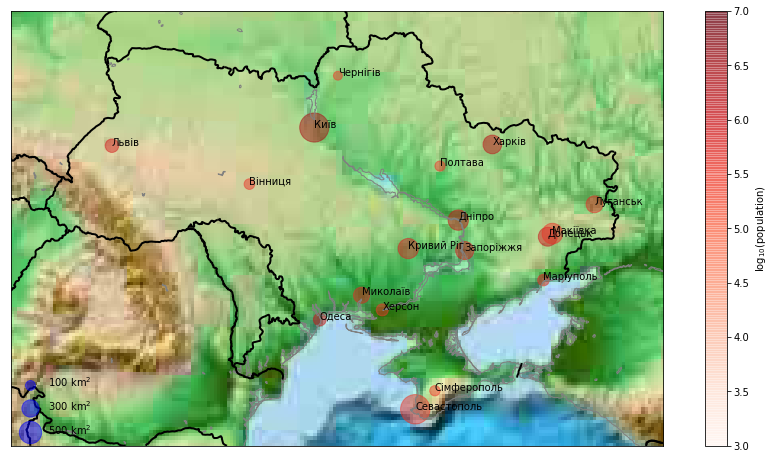

In [144]:
#@title Nice visualization

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd

# Extract the data we're interested in
name = city_data['city'].values
lat = city_data['lat'].values
lon = city_data['lng'].values
population = city_data['population'].str.replace(' ', '').values
population = population.astype(float)
area = city_data['area_km2'].values

# Split to big and small cities
big_idx = np.argwhere(population > 300000)
small_idx = np.argwhere(population <= 300000)

# 1. Draw the map background
fig = plt.figure(figsize=(15, 8))
m = Basemap(projection='lcc', resolution='h', lat_0=48.350664, lon_0=31.250373, width=1.5E6, height=1.E6)
m.etopo()
#m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='black',linewidth=2)
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting population
# and size reflecting area
m.scatter(lon[big_idx], lat[big_idx], latlon=True, 
          c=np.log10(population[big_idx]), s=area[big_idx], 
          cmap='Reds', alpha=0.5)
for ln, lt, n in zip(lon[big_idx], lat[big_idx], name[big_idx]):
  x, y = m(ln, lt)
  plt.annotate(n[0], xy=(x, y),  xycoords='data',
              xytext=(x, y), textcoords='data')

# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)

# make legend with dummy points
for a in [100, 300, 500]:
  plt.scatter([], [], c='b', alpha=0.5, s=a, label=str(a) + ' km$^2$')
  plt.legend(scatterpoints=1, frameon=False, labelspacing=1, loc='lower left');

##Example: MOEX, Resampling, Shifting, and Windowing

In [ ]:
# tools for financial data available
from pandas_datareader import data

moex = data.DataReader('USD000UTSTOM', 'moex', start='2018-07-01', end='2019-01-31')
display_pandas(moex)

,BOARDID,SHORTNAME,SECID,OPEN,LOW,HIGH,CLOSE,NUMTRADES,VOLRUR,WAPRICE
TRADEDATE,,,,,,,,,,
2017-07-03,CNGD,USDRUB_TOM,USD000UTSTOM,58.9800,58.8400,59.4250,59.3600,24,1.864785e+09,NaN
2017-07-04,CETS,USDRUB_TOM,USD000UTSTOM,59.3000,59.1350,59.4575,59.4125,21053,1.090265e+11,59.2700
2017-07-04,CNGD,USDRUB_TOM,USD000UTSTOM,59.3600,58.9300,59.3600,59.3575,37,1.046416e+09,NaN
2017-07-05,CETS,USDRUB_TOM,USD000UTSTOM,59.3000,59.3000,60.2600,59.9825,50108,2.874226e+11,59.9234
2017-07-05,CNGD,USDRUB_TOM,USD000UTSTOM,59.3400,59.2650,60.1800,60.1800,35,6.339036e+09,NaN
2017-07-06,CETS,USDRUB_TOM,USD000UTSTOM,60.1025,59.7500,60.4350,60.1600,43929,2.404461e+11,60.0714
2017-07-06,CNGD,USDRUB_TOM,USD000UTSTOM,60.0700,59.4125,60.3700,59.8650,26,4.031391e+09,NaN
2017-07-07,CETS,USDRUB_TOM,USD000UTSTOM,60.4000,60.2125,60.6250,60.3550,45691,2.561535e+11,60.4281
2017-07-07,CNGD,USDRUB_TOM,USD000UTSTOM,60.4522,59.9825,60.5700,60.5200,29,4.335937e+09,NaN


In [ ]:
# cleanpu data, remove unnecessary columns and duplicated indices
moex = moex['CLOSE']
moex = moex.loc[~moex.index.duplicated(keep='first')]
moex.head()

TRADEDATE
2017-07-03    59.3600
2017-07-04    59.4125
2017-07-05    59.9825
2017-07-06    60.1600
2017-07-07    60.3550
Name: CLOSE, dtype: float64

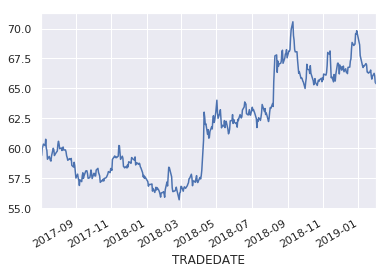

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

moex.plot();

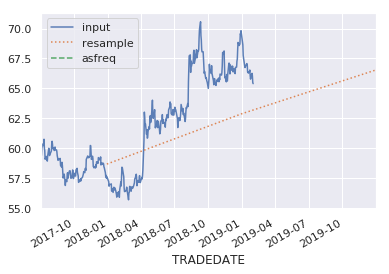

In [ ]:
moex.plot(alpha=0.9, style='-')
moex.resample('BA').mean().plot(style=':')
moex.asfreq('BA').plot(style='--');
plt.legend(['input', 'resample', 'asfreq'], loc='upper left');

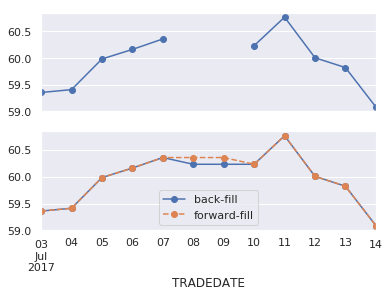

In [ ]:
fig, ax = plt.subplots(2, sharex=True)
data = moex.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')
ax[1].legend(["back-fill", "forward-fill"]);

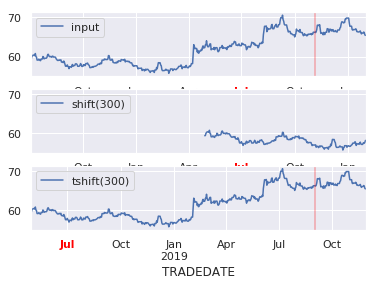

In [ ]:
fig, ax = plt.subplots(3, sharey=True)
# apply a frequency to the data
moex = moex.asfreq('D', method='pad')
moex.plot(ax=ax[0])
moex.shift(300).plot(ax=ax[1])
moex.tshift(300).plot(ax=ax[2])
# legends and annotations
local_max = pd.to_datetime('2018-11-05')
offset = pd.Timedelta(300, 'D')
ax[0].legend(['input'], loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
ax[0].axvline(local_max, alpha=0.3, color='red')
ax[1].legend(['shift(300)'], loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
ax[1].axvline(local_max + offset, alpha=0.3, color='red')
ax[2].legend(['tshift(300)'], loc=2)
ax[2].get_xticklabels()[1].set(weight='heavy', color='red')
ax[2].axvline(local_max + offset, alpha=0.3, color='red');

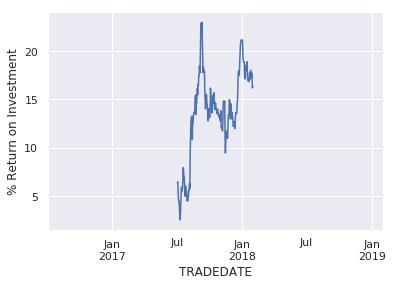

In [ ]:
ROI = 100 * (moex.tshift(-365) / moex - 1)
ROI.plot()
plt.ylabel('% Return on Investment');

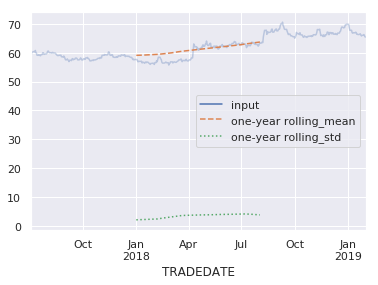

In [ ]:
rolling = moex.rolling(365, center=True)
data = pd.DataFrame({'input': moex, 'one-year rolling_mean': rolling.mean(), 'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)